# Dogecoin Price Analysis (Regression)

## Summary

This notebook performs an exploratory data analysis (EDA) on Dogecoin (DOGE/USDT) price data. The goal is to understand the data's structure, identify patterns, and prepare it for a regression-based trading model.

### Steps:
1.  **Data Loading and Inspection:** Load the dataset and examine its basic properties.
2.  **Time Coverage and Frequency Analysis:** Check the time range and resolution of the data.
3.  **Data Cleaning:** Handle any missing values or inconsistencies.
4.  **Visualization:** Create various plots to visualize price trends, volume, and other features.
5.  **Feature Exploration:** Analyze the relationships between different variables to inform the regression model.

### Step 1 – Load and get a first feel of the data (inspection)

In [1]:
import pandas as pd

df = pd.read_csv("data/BYBIT_DOGEUSDT_15m.csv", parse_dates=["Datetime"])
df = df.sort_values("Datetime").set_index("Datetime")

In [2]:
df.head()

,Open,High,Low,Close,Volume,Turnover
Datetime,,,,,,
2021-06-02 16:00:00,0.4241,0.4241,0.4241,0.4241,1482.0,628.5162
2021-06-02 16:15:00,0.4241,0.4298,0.4187,0.4291,52618.0,22330.1633
2021-06-02 16:30:00,0.4291,0.4430,0.4279,0.4418,55091.0,24080.0837
2021-06-02 16:45:00,0.4418,0.4450,0.4265,0.4274,63888.0,27850.7780
2021-06-02 17:00:00,0.4274,0.4339,0.4216,0.4327,63464.0,27179.6550


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162725 entries, 2021-06-02 16:00:00 to 2026-01-22 17:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Open      162725 non-null  float64
 1   High      162725 non-null  float64
 2   Low       162725 non-null  float64
 3   Close     162725 non-null  float64
 4   Volume    162725 non-null  float64
 5   Turnover  162725 non-null  float64
dtypes: float64(6)
memory usage: 8.7 MB


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Turnover
count,162725.000000,162725.000000,162725.000000,162725.000000,1.627250e+05,1.627250e+05
mean,0.149648,0.150205,0.149061,0.149646,1.764400e+07,3.160895e+06
std,0.083483,0.083904,0.083038,0.083480,3.844291e+07,8.619084e+06
min,0.049800,0.050100,0.048900,0.049800,0.000000e+00,0.000000e+00
25%,0.079520,0.079760,0.079300,0.079520,2.178841e+06,2.337575e+05
50%,0.133740,0.134300,0.133200,0.133740,7.074298e+06,8.376291e+05
75%,0.196190,0.196900,0.195430,0.196190,1.869877e+07,2.883731e+06
max,0.481510,0.485270,0.475980,0.481510,2.018483e+09,4.568075e+08


### Step 2 – Check time coverage and frequency

In [5]:
df.index.min(), df.index.max(), df.shape[0]

# Check expected 15-min grid
full_index = pd.date_range(df.index.min(), df.index.max(), freq="15min")
missing = full_index.difference(df.index)
print("Missing bars:", len(missing))

Missing bars: 0


In [6]:
dups = df.index.duplicated().sum()
print("Duplicate timestamps:", dups)

Duplicate timestamps: 0


### Step 3 – Basic data profiling per variable

In [7]:
# Per-column summary
summary = df.describe().T
summary["missing"] = df.isna().sum()
summary["missing_pct"] = summary["missing"] / len(df)
summary

,count,mean,std,min,25%,50%,75%,max,missing,missing_pct
Open,162725.0,1.496479e-01,8.348290e-02,0.0498,7.952000e-02,1.337400e-01,1.961900e-01,4.815100e-01,0,0.0
High,162725.0,1.502054e-01,8.390428e-02,0.0501,7.976000e-02,1.343000e-01,1.969000e-01,4.852700e-01,0,0.0
Low,162725.0,1.490613e-01,8.303820e-02,0.0489,7.930000e-02,1.332000e-01,1.954300e-01,4.759800e-01,0,0.0
Close,162725.0,1.496461e-01,8.348014e-02,0.0498,7.952000e-02,1.337400e-01,1.961900e-01,4.815100e-01,0,0.0
Volume,162725.0,1.764400e+07,3.844291e+07,0.0000,2.178841e+06,7.074298e+06,1.869877e+07,2.018483e+09,0,0.0
Turnover,162725.0,3.160895e+06,8.619084e+06,0.0000,2.337575e+05,8.376291e+05,2.883731e+06,4.568075e+08,0,0.0


### Step 4 – Visualize each variable over time (univariate time plots)

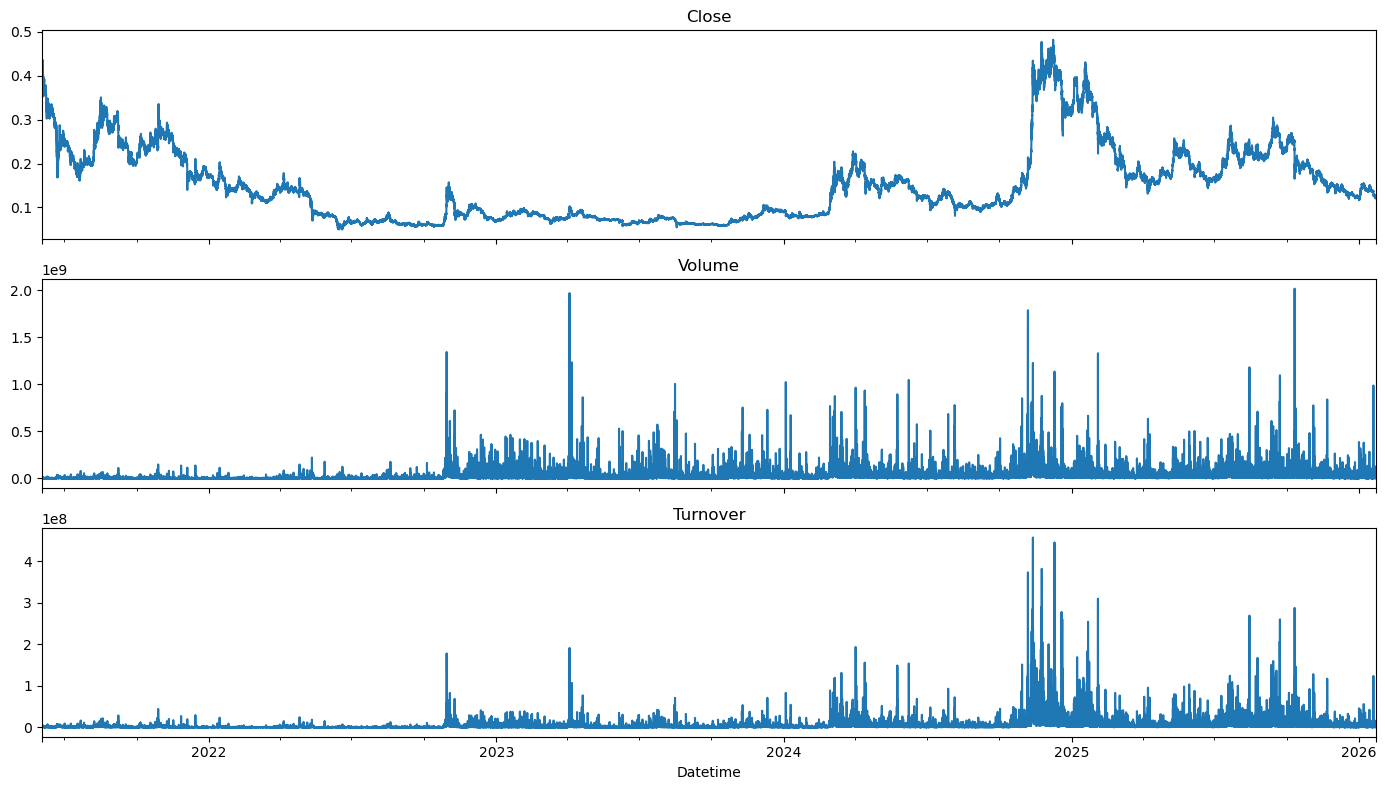

In [8]:
import matplotlib.pyplot as plt

cols_to_plot = ["Close", "Volume", "Turnover"]

fig, axes = plt.subplots(len(cols_to_plot), 1, figsize=(14, 8), sharex=True)
for ax, col in zip(axes, cols_to_plot):
    df[col].plot(ax=ax)
    ax.set_title(col)
plt.tight_layout()


### Step 5 – Check distributions and outliers per variable

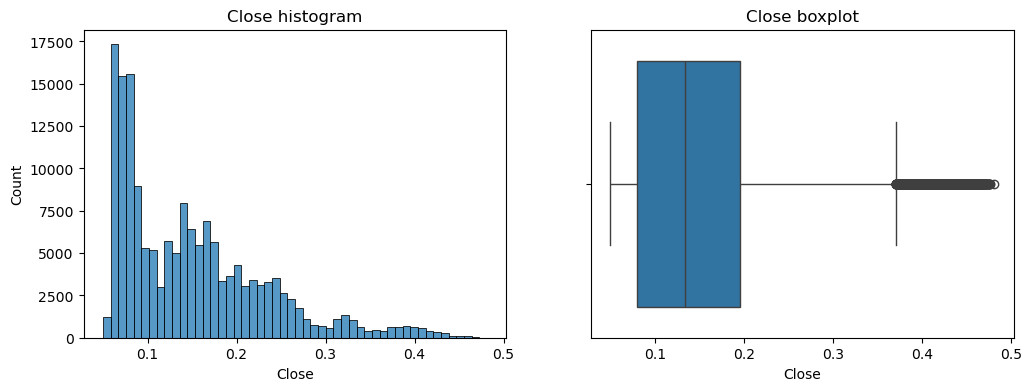

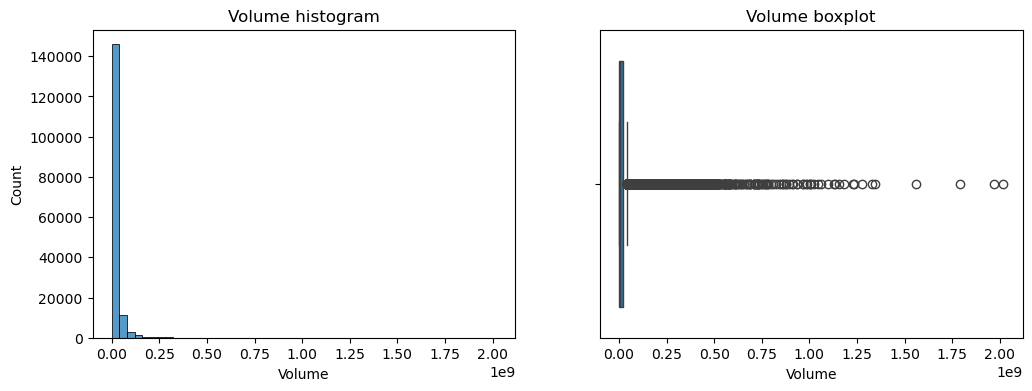

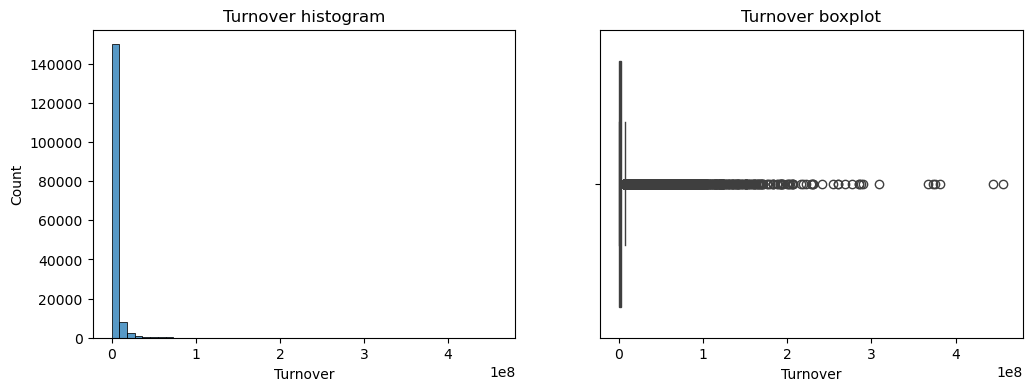

In [9]:
import seaborn as sns

for col in ["Close", "Volume", "Turnover"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col].dropna(), bins=50, ax=axes[0])
    axes[0].set_title(f"{col} histogram")

    sns.boxplot(x=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f"{col} boxplot")
    plt.show()

### Step 6 – Missing data pattern analysis

<Axes: xlabel='Datetime'>

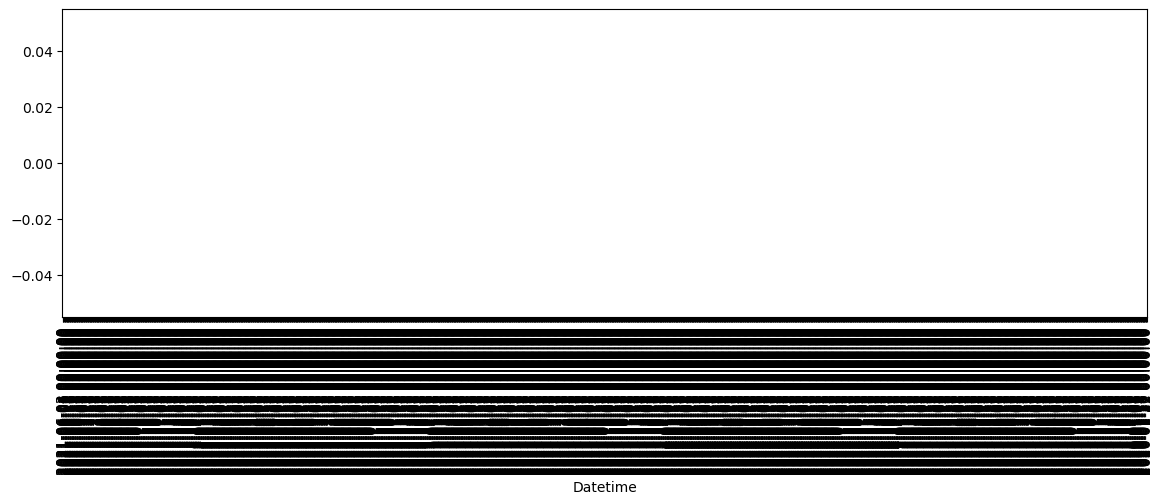

In [10]:
# Overall missing per column
df.isna().sum()

# Missing over time (e.g., for Close)
missing_close = df["Close"].isna().astype(int)
missing_close.resample("1D").sum().plot(kind="bar", figsize=(14, 4))

### Step 7 – Correlations and cross‑relationships (multivariate profiling)

#### 7.1 Correlation matrix

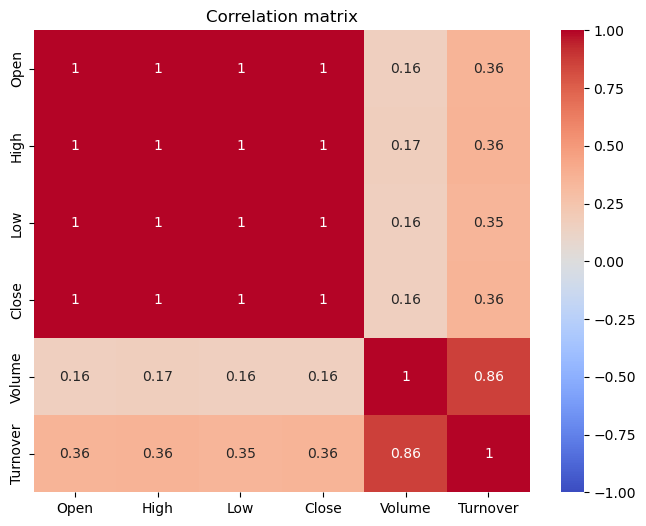

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["Open", "High", "Low", "Close", "Volume", "Turnover"]

corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

#### 7.2 Scatter plots for key pairs

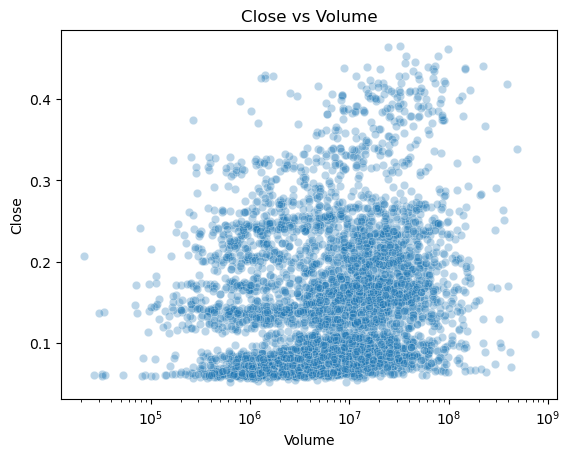

In [12]:
sns.scatterplot(data=df.sample(5000), x="Volume", y="Close", alpha=0.3)
plt.xscale("log")  # volume is often heavy-tailed
plt.title("Close vs Volume")
plt.show()

### Step 8 – Time‑series‑specific structure: trend, seasonality, volatility

#### 8.1 Rolling statistics

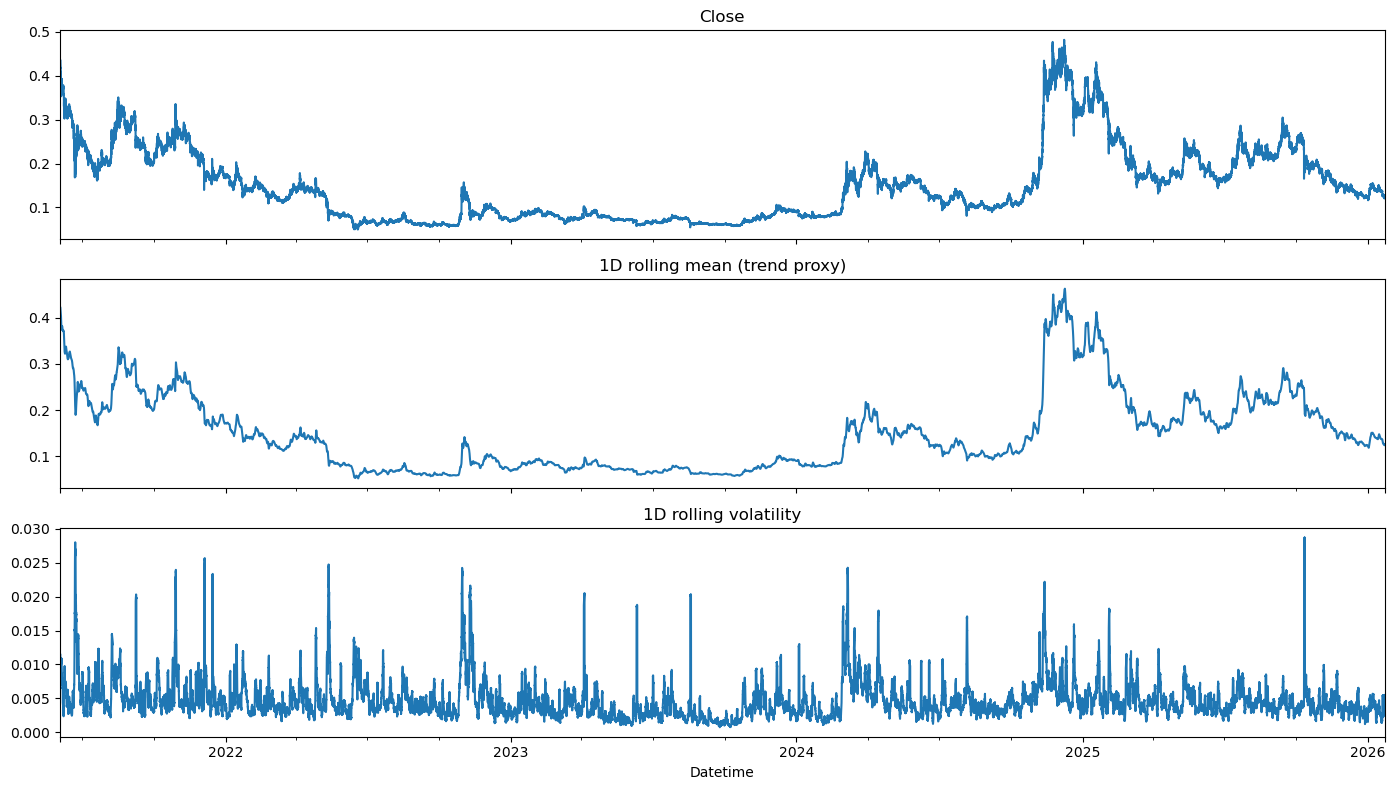

In [13]:
import numpy as np

df["log_close"] = np.log(df["Close"])
df["ret_1"] = df["log_close"].diff()

df["roll_mean_1d"] = df["Close"].rolling(96).mean()  # 96*15m = 1 day
df["roll_std_1d"] = df["ret_1"].rolling(96).std()

fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
df["Close"].plot(ax=axes[0], title="Close")
df["roll_mean_1d"].plot(ax=axes[1], title="1D rolling mean (trend proxy)")
df["roll_std_1d"].plot(ax=axes[2], title="1D rolling volatility")
plt.tight_layout()

#### 8.2 Intraday / weekly patterns (seasonality)

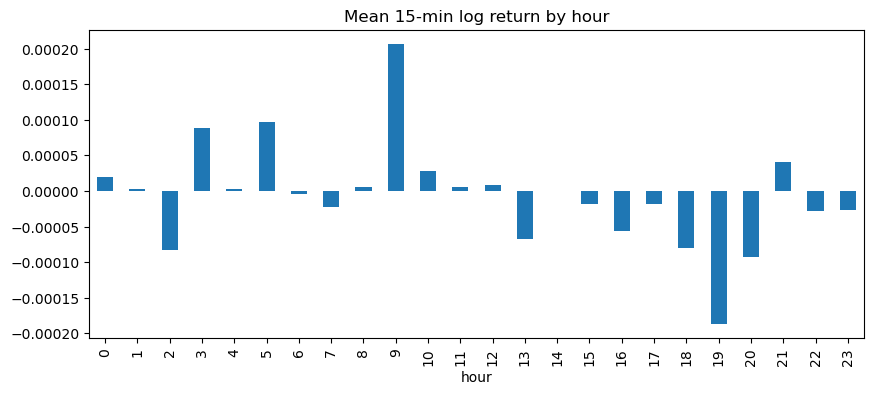

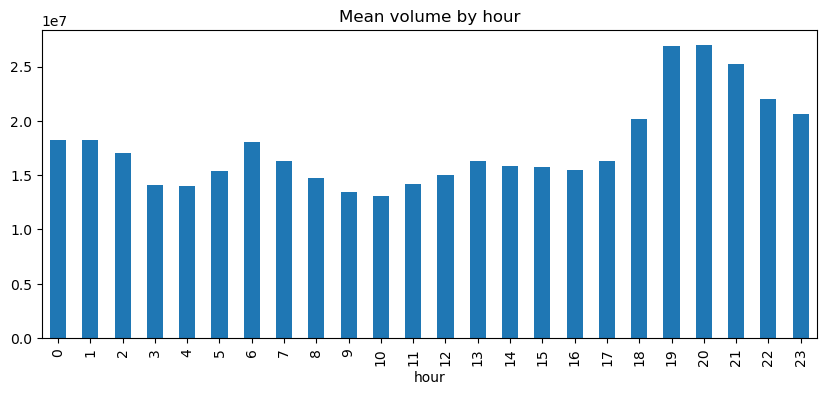

In [14]:
df["hour"] = df.index.hour
df["weekday"] = df.index.dayofweek

# Average 15-min return by hour of day
hourly_ret = df.groupby("hour")["ret_1"].mean()
hourly_ret.plot(kind="bar", figsize=(10, 4), title="Mean 15-min log return by hour")
plt.show()

# Average volume by hour
hourly_vol = df.groupby("hour")["Volume"].mean()
hourly_vol.plot(kind="bar", figsize=(10, 4), title="Mean volume by hour")
plt.show()

### Step 9 – Outlier detection (time‑aware)

In [15]:
# Rolling z-score on returns and volume
win = 96  # 1 day
ret_mean = df["ret_1"].rolling(win).mean()
ret_std = df["ret_1"].rolling(win).std()
df["ret_z"] = (df["ret_1"] - ret_mean) / ret_std

vol_mean = df["Volume"].rolling(win).mean()
vol_std = df["Volume"].rolling(win).std()
df["vol_z"] = (df["Volume"] - vol_mean) / vol_std

# Flag extreme events
outliers = df[(df["ret_z"].abs() > 5) | (df["vol_z"].abs() > 5)]
outliers[["Close", "Volume", "ret_1", "ret_z", "vol_z"]].head()

,Close,Volume,ret_1,ret_z,vol_z
Datetime,,,,,
2021-06-03 23:15:00,0.3916,11718885.0,-0.025714,-2.645057,5.379330
2021-06-07 19:30:00,0.3653,5907690.0,-0.006820,-2.629841,6.138920
2021-06-08 02:15:00,0.3465,7024893.0,-0.027890,-6.366240,4.721234
2021-06-08 20:45:00,0.3054,16216434.0,0.010533,1.407095,5.504781
2021-06-09 22:00:00,0.3482,20777343.0,0.029435,3.795184,8.416615


### Step 10 – Summary of Findings and Next Steps

This section summarizes the key findings from the Exploratory Data Analysis (EDA) of the DOGEUSDT 15-minute dataset and outlines the necessary preprocessing steps for model training.

#### Data Integrity
*   **Completeness**: The dataset is robust, with no missing 15-minute intervals or duplicate timestamps within the covered period.
*   **Missing Values**: The raw data for `Open`, `High`, `Low`, `Close`, `Volume`, and `Turnover` contains no missing values.
*   **Engineered NaNs**: Missing values are introduced intentionally during feature engineering. Specifically:
    *   The first row of `ret_1` (log return) is NaN because it's calculated using `diff()`.
    *   Features based on rolling windows (e.g., `roll_mean_1d`, `roll_std_1d`, `ret_z`) have NaN values at the beginning of the series, corresponding to the length of the window.

#### Data Characteristics
*   **Distributions**:
    *   The `Close` price exhibits significant price movements, typical of a volatile crypto asset.
    *   `Volume` and `Turnover` are highly skewed and heavy-tailed, with most of the activity concentrated in a small number of high-volume periods. Log transformation is recommended for these features before feeding them into scale-sensitive models.
*   **Correlations**:
    *   As expected, the OHLC prices (`Open`, `High`, `Low`, `Close`) are almost perfectly correlated (>0.99).
    *   `Volume` and `Turnover` are also very highly correlated.
*   **Seasonality**: Analysis of hourly data reveals clear intraday patterns in both mean returns and trading volume, suggesting that time of day is a potentially useful feature.
*   **Outliers**: The analysis identified several data points with extreme z-scores for returns and volume. These appear to be legitimate market events (volatility spikes) rather than data errors.

### Proposed Preprocessing Plan

1.  **Handle Engineered NaNs**: The initial rows containing NaNs from `diff()` and `rolling()` operations must be handled. Dropping these rows is the most straightforward approach.
2.  **Feature Scaling**: Apply a log transformation to `Volume` and `Turnover` to normalize their distributions and reduce the impact of extreme values.
3.  **Outlier Management**: The identified outliers are characteristic of the market's behavior and should be retained, as they contain important information about volatility. Clipping or winsorizing could be considered if a model is overly sensitive to them, but it is not recommended as a first step.
4.  **Feature Selection**: To avoid multicollinearity, it's advisable to use only the `Close` price instead of all four OHLC prices. Similarly, `Turnover` is redundant if `Volume` is used. The engineered features like rolling means, volatility, and time-based features (`hour`, `weekday`) should be prioritized.